In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#!ls "/content/drive/MyDrive/TESIS MAESTRIA BIG DATA"

In [3]:
#!pip install skranger
!pip install xgboost
!pip install pyspark
!pip install plotly
!pip install folium
from xgboost import XGBClassifier
import sys
import folium
import json
import requests
import os
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta as td
from dateutil.relativedelta import relativedelta as rt
import pyspark
import pandas as pd
from plotly import graph_objects as go
import numpy as np
import seaborn as sns
plt.style.use('ggplot')
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import utils

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.
Using TensorFlow backend.


In [4]:
datatrain_muestra_500=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatrain_muestra_500.csv', header=0)
datatrain_muestra_300=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatrain_muestra_300.csv', header=0)
datatrain_muestra_200=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatrain_muestra_200.csv', header=0)
datatrain_muestra_100=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatrain_muestra_100.csv', header=0)

dataval_muestra_250=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/dataval_muestra_250.csv', header=0)
dataval_muestra_150=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/dataval_muestra_150.csv', header=0)
dataval_muestra_100=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/dataval_muestra_100.csv', header=0)
dataval_muestra_50=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/dataval_muestra_50.csv', header=0)

datatest_muestra_210=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatest_muestra_210.csv', header=0)
datatest_muestra_120=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatest_muestra_120.csv', header=0)
datatest_muestra_90=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatest_muestra_90.csv', header=0)
datatest_muestra_32=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatest_muestra_32.csv', header=0)

In [5]:
X_cols = ['merchant','amt','zip',
          'job','Hora','Edad', 'category_food_dining', 
          'category_gas_transport','category_grocery_net','category_grocery_pos',
          'category_health_fitness','category_home','category_kids_pets','category_misc_net',
          'category_misc_pos','category_personal_care','category_shopping_net','category_shopping_pos',
          'category_travel','gender_M','week_Monday','week_Saturday','week_Sunday','week_Thursday',
          'week_Tuesday','week_Wednesday', 'dist', 'hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_trans_amt_avg_60d']

Y_cols = ['is_fraud']

In [6]:
X_train_500 = datatrain_muestra_500[X_cols]
y_train_500 = datatrain_muestra_500[Y_cols]
X_val_250 = dataval_muestra_250[X_cols]
y_val_250 = dataval_muestra_250[Y_cols]
X_test_210 = datatest_muestra_210[X_cols]
y_test_210 = datatest_muestra_210[Y_cols]

In [7]:
X_train_300 = datatrain_muestra_300[X_cols]
y_train_300 = datatrain_muestra_300[Y_cols]
X_val_150 = dataval_muestra_150[X_cols]
y_val_150 = dataval_muestra_150[Y_cols]
X_test_120 = datatest_muestra_120[X_cols]
y_test_120 = datatest_muestra_120[Y_cols]

In [8]:
X_train_200 = datatrain_muestra_200[X_cols]
y_train_200 = datatrain_muestra_200[Y_cols]
X_val_100 = dataval_muestra_100[X_cols]
y_val_100 = dataval_muestra_100[Y_cols]
X_test_90 = datatest_muestra_90[X_cols]
y_test_90 = datatest_muestra_90[Y_cols]

In [9]:
X_train_100 = datatrain_muestra_100[X_cols]
y_train_100 = datatrain_muestra_100[Y_cols]
X_val_50 = dataval_muestra_50[X_cols]
y_val_50 = dataval_muestra_50[Y_cols]
X_test_32 = datatest_muestra_32[X_cols]
y_test_32 = datatest_muestra_32[Y_cols]

In [10]:
RFC = RandomForestClassifier()


# Número de árboles a realizar.
n_estimators = [200, 300, 500]

# número máximo de características consideradas para dividir un nodo
max_features = ['auto', 'sqrt']

# Número máximo de niveles en cada árbol de decisión
max_depth = [None,10, 20, 50]

# Número mínimo de muestras necesarias para dividir un nodo
min_samples_split = [5, 20, 50]

# Número mínimo de muestras necesarias en cada nodo hoja
min_samples_leaf = [1, 2, 4, 20]

# Método para muestrear puntos de datos (con o sin reemplazo)
bootstrap = [True, False]

# Creando el grid
RFC_grid = {'n_estimators': n_estimators,'max_features': max_features, 'max_depth': max_depth, 
            'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

RFC_grid

{'n_estimators': [200, 300, 500],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [None, 10, 20, 50],
 'min_samples_split': [5, 20, 50],
 'min_samples_leaf': [1, 2, 4, 20],
 'bootstrap': [True, False]}

In [11]:
#RFC_GRID_BUSQUEDA = GridSearchCV(estimator=RFC, param_grid=RFC_grid, cv = 3, verbose=1, n_jobs = -1)

In [12]:
#RFC_GRID_BUSQUEDA_500=RFC_GRID_BUSQUEDA.fit(X_train_500, y_train_500)
#RFC_GRID_BUSQUEDA_300=RFC_GRID_BUSQUEDA.fit(X_train_300, y_train_300)
#RFC_GRID_BUSQUEDA_200=RFC_GRID_BUSQUEDA.fit(X_train_200, y_train_200)
#RFC_GRID_BUSQUEDA_100=RFC_GRID_BUSQUEDA.fit(X_train_100, y_train_100)

In [13]:
#print(RFC_GRID_BUSQUEDA_500.best_params_)
#print(RFC_GRID_BUSQUEDA_300.best_params_)
#print(RFC_GRID_BUSQUEDA_200.best_params_)
#print(RFC_GRID_BUSQUEDA_100.best_params_)

In [14]:
RF_500 = RandomForestClassifier(bootstrap=True, min_samples_split=5,
                       n_estimators=200, class_weight= 'balanced')
RF_500.fit(X_train_500, y_train_500)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(class_weight='balanced', min_samples_split=5,
                       n_estimators=200)

In [15]:
RFC_PRED = RF_500.predict(X_test_210)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test_210, RFC_PRED))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209189
           1       1.00      1.00      1.00       811

    accuracy                           1.00    210000
   macro avg       1.00      1.00      1.00    210000
weighted avg       1.00      1.00      1.00    210000



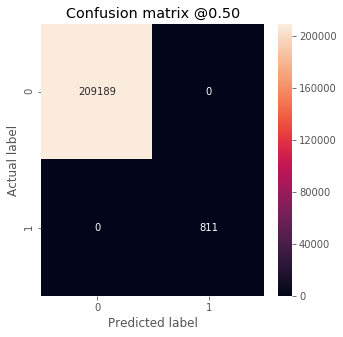

In [17]:
utils.plot_cm(y_test_210, RFC_PRED)

In [18]:
import joblib 
joblib.dump(RF_500, 'RF.joblib') # Guardo el modelo.

['RF.joblib']

In [19]:
#ALTA MODELO Y TESTS
RF_ALTA = joblib.load('RF.joblib')

RF_predictions_120 = RF_ALTA.predict(X_test_120)
RF_predictions_90 = RF_ALTA.predict(X_test_90)
RF_predictions_32 = RF_ALTA.predict(X_test_32)

In [20]:
print(classification_report(y_test_120, RF_predictions_120))
print(classification_report(y_test_90, RF_predictions_90))
print(classification_report(y_test_32, RF_predictions_32))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    119545
           1       1.00      1.00      1.00       455

    accuracy                           1.00    120000
   macro avg       1.00      1.00      1.00    120000
weighted avg       1.00      1.00      1.00    120000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     89650
           1       1.00      1.00      1.00       350

    accuracy                           1.00     90000
   macro avg       1.00      1.00      1.00     90000
weighted avg       1.00      1.00      1.00     90000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31887
           1       1.00      1.00      1.00       113

    accuracy                           1.00     32000
   macro avg       1.00      1.00      1.00     32000
weighted avg       1.00      1.00      1.00     32000



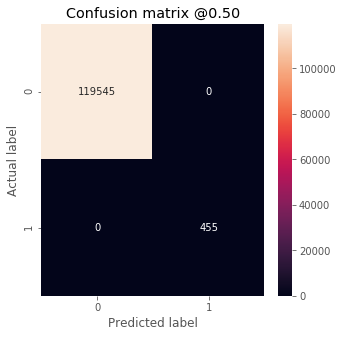

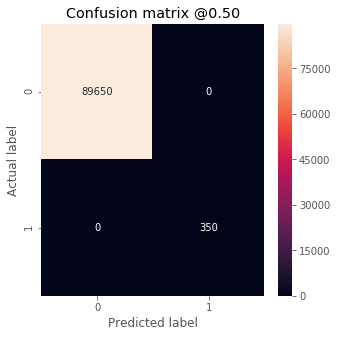

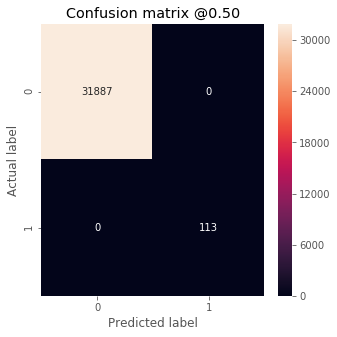

In [21]:
utils.plot_cm(y_test_120, RF_predictions_120)
utils.plot_cm(y_test_90, RF_predictions_90)
utils.plot_cm(y_test_32, RF_predictions_32)